In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_sacks_salary_19-20')

In [3]:
qbs.dtypes

NAME           object
SACKS           int64
SACKS_rank    float64
salary          int64
dtype: object

In [4]:
qbs.head()

,NAME,SACKS,SACKS_rank,salary
0,Ben Roethlisberger,2,2.0,34000000
1,Matt Schaub,2,2.0,1890000
2,Matt Barkley,2,2.0,2000000
3,Robert Griffin III,4,4.0,2000000
4,Drew Lock,5,6.5,1752704


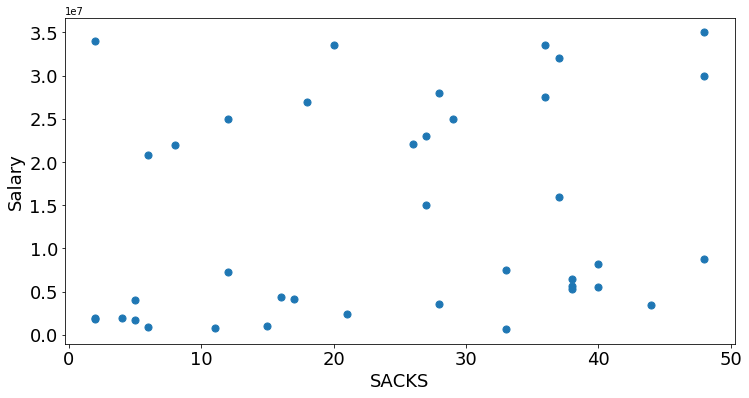

In [5]:
ax = qbs.plot(kind="scatter", x = 'SACKS',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('SACKS', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['SACKS', 'salary']])

In [7]:
X.mean(axis = 0)

array([ 3.41607085e-17, -1.70803542e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[ 0.95177766, -0.69058475],
       [ 0.33426572,  0.64836833],
       [-0.99224141, -0.92524067],
       [-0.90075816,  1.11023557],
       [ 1.15761497,  1.49142243]])

In [11]:
km.predict(X)

array([3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 1, 1, 1, 0,
       1, 1, 0, 0, 4, 4, 4, 1, 0, 0, 0, 0, 0, 0, 0, 4, 4], dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,SACKS,SACKS_rank,salary,clusters
0,Ben Roethlisberger,2,2.0,34000000,3
1,Matt Schaub,2,2.0,1890000,2
2,Matt Barkley,2,2.0,2000000,2
3,Robert Griffin III,4,4.0,2000000,2
4,Drew Lock,5,6.5,1752704,2


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[3.80000000e+01, 5.51652130e+06],
       [2.90000000e+01, 2.15222222e+07],
       [9.66666667e+00, 2.71146975e+06],
       [1.10000000e+01, 2.70433333e+07],
       [4.10000000e+01, 3.16000000e+07]])

In [14]:
qbs.groupby('clusters')[['SACKS', 'salary']].mean()

,SACKS,salary
clusters,,
0,38.000000,5.516521e+06
1,29.000000,2.152222e+07
2,9.666667,2.711470e+06
3,11.000000,2.704333e+07
4,41.000000,3.160000e+07


In [15]:
centroids = qbs.groupby('clusters')[['SACKS', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

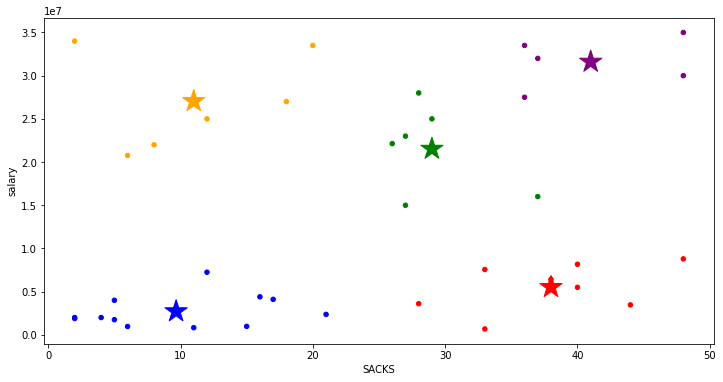

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'SACKS', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'SACKS', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

8.806073751249379

In [18]:
silhouette_score(X, km.labels_)

0.540225953790622